In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Establish database connection
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="muhammadanees15402",
    database="ecommerce"
)

# Create a cursor object
cur = db.cursor()

## 1. Calculate the number of orders per month in 2018.

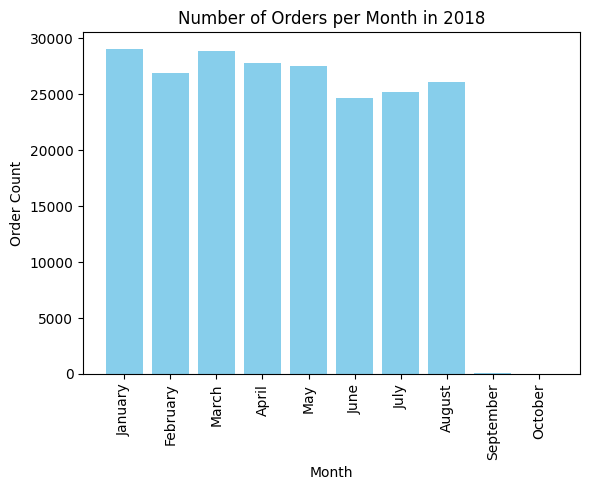

In [5]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="muhammadanees15402",
    database="ecommerce"
)
cur = db.cursor()
query = """
SELECT 
    MONTH(order_purchase_timestamp) AS month_num,  -- Get the month number
    MONTHNAME(order_purchase_timestamp) AS months, -- Get the month name
    COUNT(order_id) AS order_count                 -- Count the number of orders
FROM orders 
WHERE YEAR(order_purchase_timestamp) = 2018        -- Filter for orders in 2018
GROUP BY month_num, months                        -- Group by month number and name
ORDER BY month_num;                               -- Order by month number
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["month_num", "months", "order_count"])
plt.figure(figsize=(6, 5))  # Set the figure size
plt.bar(df["months"], df["order_count"], color="skyblue")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.title("Number of Orders per Month in 2018")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
cur.close()
db.close()

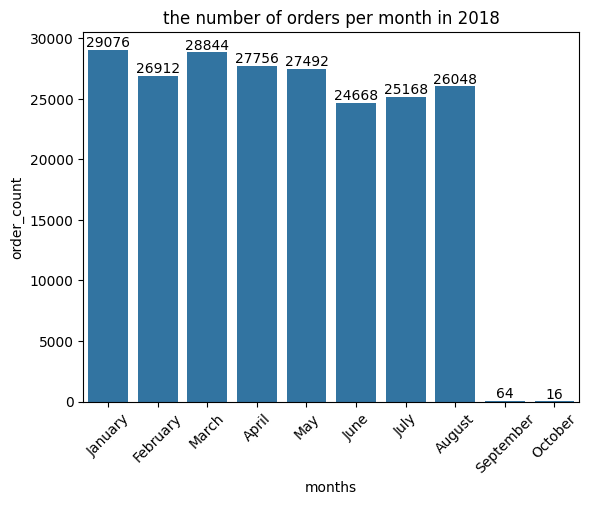

In [26]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="muhammadanees15402",
    database="ecommerce"
)
cur = db.cursor()
query = """
SELECT 
    MONTH(order_purchase_timestamp) AS month_num,  -- Get the month number
    MONTHNAME(order_purchase_timestamp) AS months, -- Get the month name
    COUNT(order_id) AS order_count                 -- Count the number of orders
FROM orders 
WHERE YEAR(order_purchase_timestamp) = 2018        -- Filter for orders in 2018
GROUP BY month_num, months                        -- Group by month number and name
ORDER BY month_num;                               -- Order by month number
""
cur.execute(query)
data = cur.fetchall()

# Print the results
df = pd.DataFrame(data,columns=["month_num","months","order_count"])
ax = sns.barplot(x=df["months"],y=df["order_count"],data = df,)
ax.bar_label(ax.containers[0])
plt.title("the number of orders per month in 2018")
plt.xticks(rotation =45)
plt.show()
cur.close()
db.close()

# Find the average number of products per order, grouped by customer city.

In [4]:
query = """
WITH count_per_order AS (
    SELECT 
        orders.order_id, 
        orders.customer_id, 
        COUNT(order_items.order_id) AS oc  -- Count products per order
    FROM orders
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)
SELECT 
    customers.customer_city, 
    ROUND(AVG(count_per_order.oc), 2) AS avg_products_per_order  -- Calculate average products per order
FROM customers
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city;  -- Group by city
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data ,columns= ["customer_city","avg_per_order"])
df.head(10)

,customer_city,avg_per_order
0,treze tilias,5.09
1,indaial,4.46
2,sao jose dos campos,4.55
3,sao paulo,4.62
4,porto alegre,4.70
5,santos,4.65
6,sao francisco do sul,4.94
7,sao vicente,4.36
8,joinville,4.41
9,sao vendelino,4.00


## Calculate the percentage of total revenue contributed by each product category

In [8]:
query = """
          SELECT 
    UPPER(products.product_category) AS category,
    ROUND(SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments) * 100, 2) AS sales_percentage
FROM 
    products 
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    orders ON order_items.order_id = orders.order_id
JOIN 
    payments ON payments.order_id = orders.order_id
GROUP BY 
    category
ORDER BY 
    sales_percentage DESC;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data ,columns= ["category","percentage"])
df.head(10)

,category,percentage
0,BED TABLE BATH,128.37
1,HEALTH BEAUTY,124.23
2,COMPUTER ACCESSORIES,118.83
3,FURNITURE DECORATION,107.20
4,WATCHES PRESENT,107.13
5,SPORT LEISURE,104.35
6,HOUSEWARES,82.06
7,AUTOMOTIVE,63.89
8,GARDEN TOOLS,62.84
9,COOL STUFF,58.44


# Identify the correlation between product price and the number of times a product has been purchased.

In [15]:
query = """
       select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id =order_items.product_id
group by products.product_category;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data ,columns= ["category","no_product","avg_price"])
df.head(10)


,category,no_product,avg_price
0,HEALTH BEAUTY,29010,130.16
1,sport leisure,25923,114.34
2,Cool Stuff,11388,167.36
3,computer accessories,23481,116.51
4,Watches present,17973,201.14
5,housewares,20892,90.79
6,electronics,8301,57.91
7,None,4809,112.00
8,toys,12351,117.55
9,bed table bath,33345,93.30


# Calculate the total revenue generated by each seller, and rank them by revenue.

In [25]:
query = """
          select *, dense_rank() over(order by revenue desc) as rn from
   (select order_items.seller_id,sum(payments.payment_value) revenue
from order_items join payments on
order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data ,columns= ["saller_id","revenue","rank"])
df.head(20)


,saller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
5,da8622b14eb17ae2831f4ac5b9dab84a,272219.319315,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,264166.120939,7
7,955fee9216a65b617aa5c0531780ce60,236322.300502,8
8,fa1c13f2614d7b5c4749cbc52fecda94,206513.229870,9
9,7e93a43ef30c4f03f38b393420bc753a,185134.209706,10


### #Calculate the moving average of order values for each customer over their order history

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
